<a href="https://colab.research.google.com/github/afujii/class/blob/main/%E5%A4%9A%E6%AC%A1%E5%85%83%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%88%E3%83%B3%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニュートン法（多次元）
2変数のニュートン法の解説を行う。講義動画と併用することを沿うてしている。<br>
次の関数を最小化する　$\boldsymbol{x}$　をニュートン法を用いて求めてみる<br>
$
f(\boldsymbol{x}) =(x_1 - 0.4 ) ^2 + (x_1^2 - x_2)^2
$


In [ ]:
import numpy as np
from scipy.optimize import minimize

def function( x ):
	return (x[0]-0.4)**2 +(x[0]**2-x[1])**2

sklearn の　最適化法には色々な手法が選択できる。Newton法を適用させる。<br>
まず、勾配ベクトルは次のようになる。<br>
$
\nabla f(\boldsymbol{x}) = [ \begin{array}{clr} 
2(x_1-0.4)+4x_1(x_1^2-x_2) \\
-2(x_1^2-x_2)
\end{array} ]
$

In [ ]:
def func_dev( x ):
        return np.array( [2*(x[0]-0.4)+4*(x[0]**2 - x[1]),-2*(x[0]**2 - x[1])] )

次に、ヘッセ行列は次のようになる。<br>
$
\nabla^2f(\boldsymbol{x})= [\begin{array}{@{\,}cc@{\,}} 
12x_1^2-4x_2+2 & -4x_1 \\
-4x_1  & 2
\end{array} ]
$

In [ ]:
def Hessian(x):
    # ヘッセ行列
    return np.array([[12*x[0]**2 -4*x[1] +2 , -4*x[0]] ,[-4*x[0],2]])

初期値として、（0.7, 0.1）とする。

改めて、ニュートン法のアルゴリズムをコードとして記述する。<br>
$
0) \boldsymbol{x} の適当な初期値　\boldsymbol{x}^{(0)} を定める。　k \leftarrow 0 \\  
1)\nabla f (\boldsymbol{x}^{(k)}) = \boldsymbol{0} ならば　\boldsymbol{x}^{k}を局所最適解として出力し計算修了。さもなくば2) へ　\\
2)\boldsymbol{x}^{(k+1)} \leftarrow \boldsymbol{x}^{k} - \nabla^2 f (\boldsymbol{x}^{k})^{-1} \nabla f(\boldsymbol{x}^{(k)}) により　\boldsymbol{x}^{k}　を更新する。　k \leftarrow k+1 として、1) へ。
$

In [ ]:
k = 0
epsilon = 1e-4
x0 = np.array([0.7,0.01])
Trace = []
while abs( func_dev(x0) ).any()  > epsilon:
  x1 = x0 - np.dot(np.linalg.inv(Hessian(x0)), func_dev(x0))# ヘッセ行列の逆行列と勾配ベクトルの積をとる
  print(k,function(x1),x1,func_dev(x1))
  x0 = x1
  k += 1
  Trace.append(x1)


0 0.008099999999999994 [0.4  0.07] [ 0.36 -0.18]
1 0.008447075695772372 [0.30847458 0.08677966] [-0.14954323 -0.01675381]
2 0.00020469601111017523 [0.38709709 0.14366266] [-0.00107982 -0.012363  ]
3 5.840634971737449e-05 [0.39235765 0.15391685] [-1.51740155e-02 -5.53468743e-05]
4 4.510372105693754e-09 [0.39996595 0.15991487] [ 0.00016344 -0.00011577]
5 4.825158554492091e-09 [0.39993054 0.15994443] [-1.38921707e-04 -2.50790055e-09]
6 2.5545429690132383e-17 [0.4        0.15999999] [ 1.62896205e-08 -9.64989899e-09]
7 3.352339780740648e-17 [0.39999999 0.16      ] [-1.15798786e-08 -5.55111512e-17]
8 3.0814879110195774e-33 [0.4  0.16] [-1.11022302e-16 -0.00000000e+00]
9 0.0 [0.4  0.16] [ 0. -0.]


図によって収束の過程を示そう。

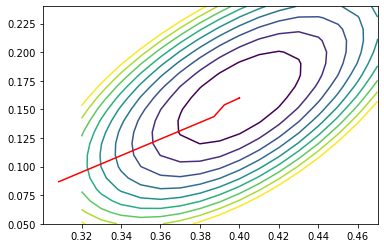

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0.32, 0.48, 0.01) # x軸
y = np.arange(0.05, 0.25, 0.01) # y軸
X, Y = np.meshgrid(x, y)
Z = function([X,Y])
levels = np.arange(0.001, 0.01, 0.001)
cont = plt.contour(X,Y,Z,levels=levels)
plt.plot(np.array(Trace)[1:,0], np.array(Trace)[1:,1], color='red')
plt.show()